In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
flights = pd.read_csv('Final_FLights_Cords.csv')
print(flights.shape)

(3000000, 36)


In [4]:
flights.sample(20)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,o_latitude,o_longitude,d_latitude,d_longitude
2308444,2021-10-26,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1699,LAX,"Los Angeles, CA",IAD,"Washington, DC",...,2288.0,NaN,NaN,NaN,NaN,NaN,33.942501,-118.407997,38.944500,-77.455803
56024,2019-10-24,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,3950,MOT,"Minot, ND",MSP,"Minneapolis, MN",...,449.0,NaN,NaN,NaN,NaN,NaN,48.259399,-101.279999,44.882000,-93.221802
2945127,2021-06-10,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,772,SAN,"San Diego, CA",EWR,"Newark, NJ",...,2425.0,NaN,NaN,NaN,NaN,NaN,32.733601,-117.190002,40.692501,-74.168701
2534950,2023-07-26,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,3366,PDX,"Portland, OR",SEA,"Seattle, WA",...,129.0,NaN,NaN,NaN,NaN,NaN,45.588699,-122.598000,47.449001,-122.308998
601565,2020-02-20,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,357,ORD,"Chicago, IL",AUS,"Austin, TX",...,977.0,91.0,0.0,0.0,0.0,0.0,41.978600,-87.904800,30.194500,-97.669899
1957566,2022-03-21,Envoy Air,Envoy Air: MQ,MQ,20398,3865,DFW,"Dallas/Fort Worth, TX",LFT,"Lafayette, LA",...,351.0,NaN,NaN,NaN,NaN,NaN,32.896801,-97.038002,30.205299,-91.987602
1667128,2022-05-17,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,3452,AUS,"Austin, TX",SJC,"San Jose, CA",...,1476.0,NaN,NaN,NaN,NaN,NaN,30.194500,-97.669899,37.362598,-121.929001
1685150,2022-04-11,JetBlue Airways,JetBlue Airways: B6,B6,20409,2473,JFK,"New York, NY",CHS,"Charleston, SC",...,636.0,NaN,NaN,NaN,NaN,NaN,40.639801,-73.778900,32.898602,-80.040497
2936001,2023-01-05,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1362,ATL,"Atlanta, GA",BHM,"Birmingham, AL",...,134.0,NaN,NaN,NaN,NaN,NaN,33.636700,-84.428101,33.562901,-86.753502
2098006,2019-07-29,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,461,PHX,"Phoenix, AZ",EWR,"Newark, NJ",...,2133.0,0.0,0.0,200.0,0.0,0.0,33.434299,-112.012001,40.692501,-74.168701


In [5]:
flights.columns


Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT', 'o_latitude', 'o_longitude', 'd_latitude',
       'd_longitude'],
      dtype='object')

In [6]:
NAs = pd.concat([flights.isnull().sum()], axis = 1, keys = ['flights'])
NAs[NAs.sum(axis=1) > 0]

,flights
DEP_TIME,77615
DEP_DELAY,77644
TAXI_OUT,78806
WHEELS_OFF,78806
WHEELS_ON,79944
TAXI_IN,79944
ARR_TIME,79942
ARR_DELAY,86198
CANCELLATION_CODE,2920860
CRS_ELAPSED_TIME,14


<Axes: xlabel='AIR_TIME', ylabel='ARR_DELAY'>

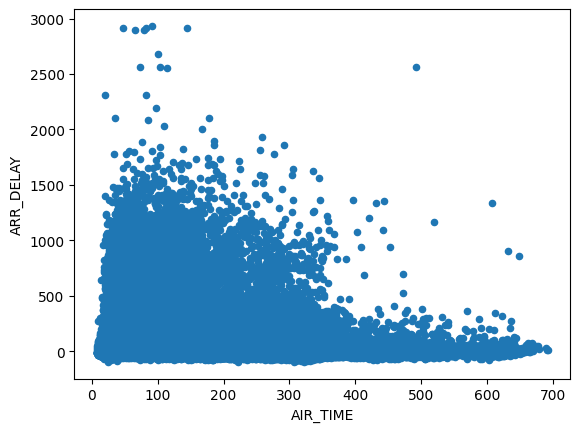

In [23]:
flights.plot.scatter(x = "AIR_TIME", y = "ARR_DELAY")


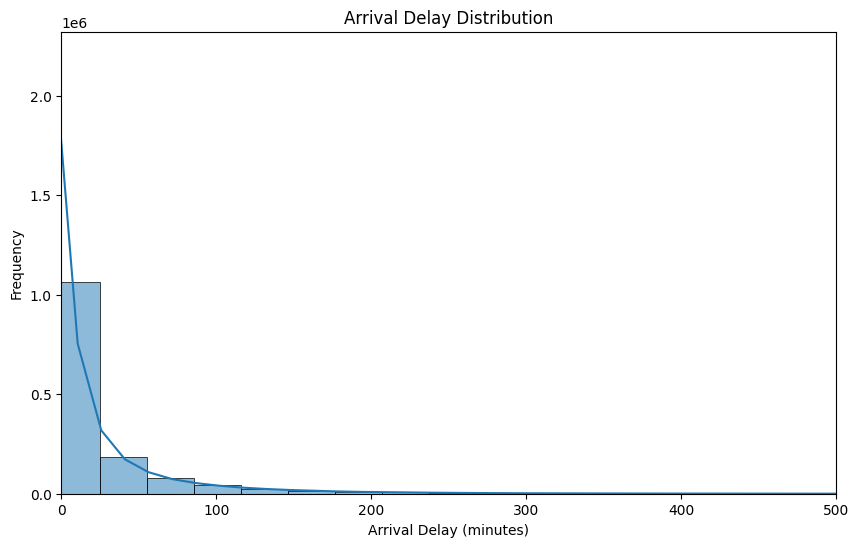

In [14]:
num_bins = 100
plt.figure(figsize=(10, 6))
sns.histplot(flights['ARR_DELAY'], bins=num_bins, kde=True)
plt.title('Arrival Delay Distribution')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 500)
plt.show()

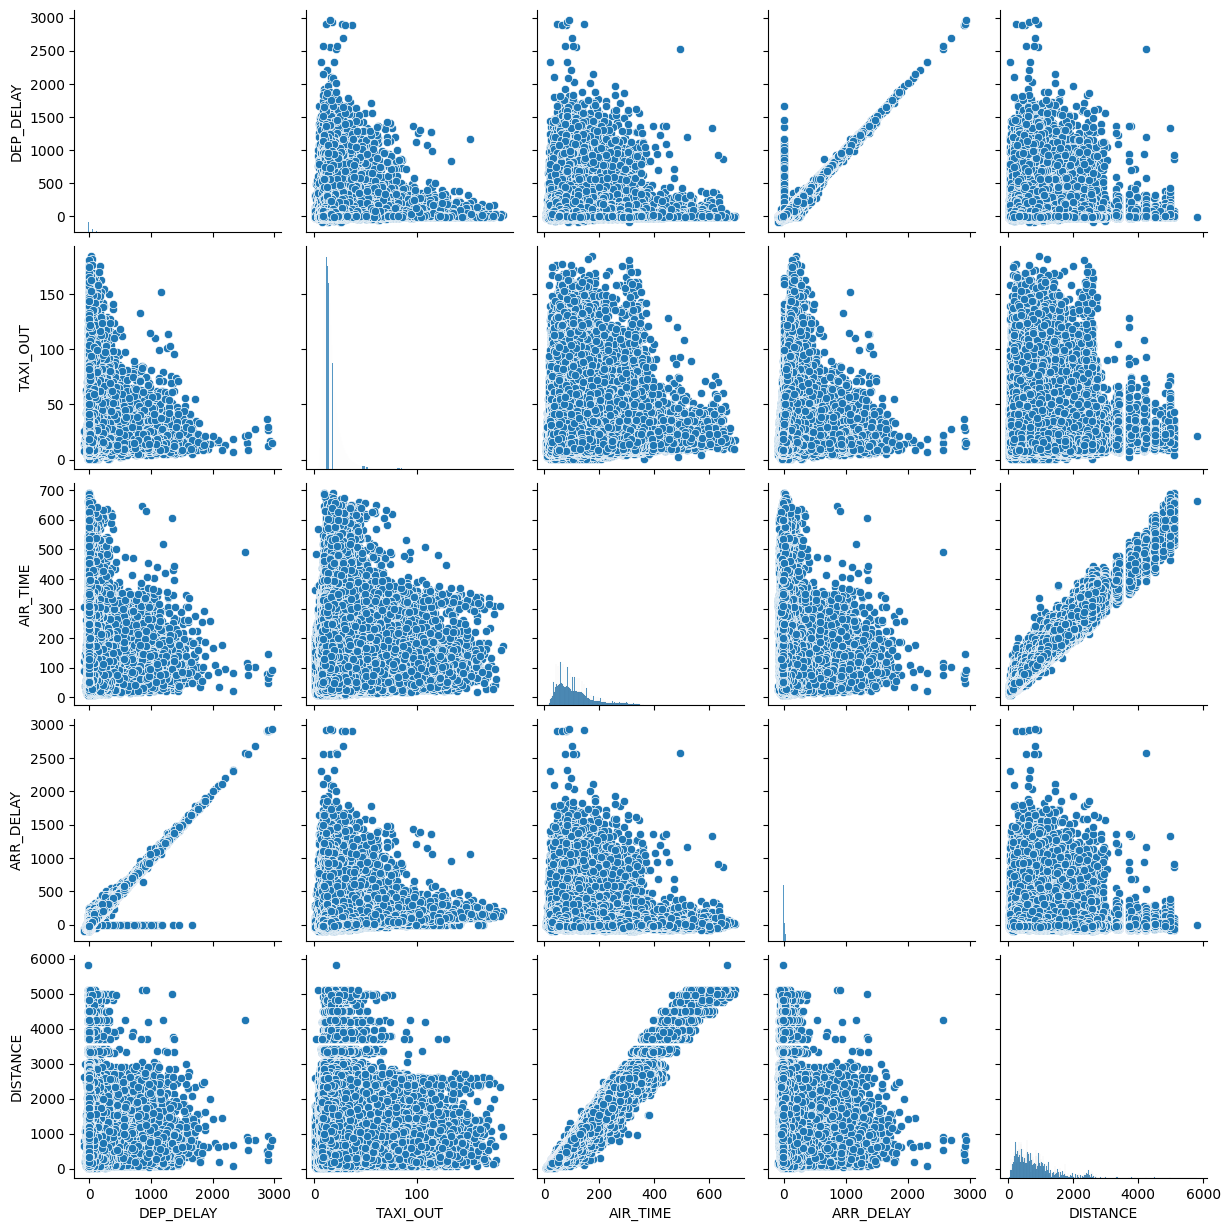

In [15]:
selected_features = ['DEP_DELAY', 'TAXI_OUT', 'AIR_TIME', 'ARR_DELAY', 'DISTANCE']
sns.pairplot(flights[selected_features])
plt.show()


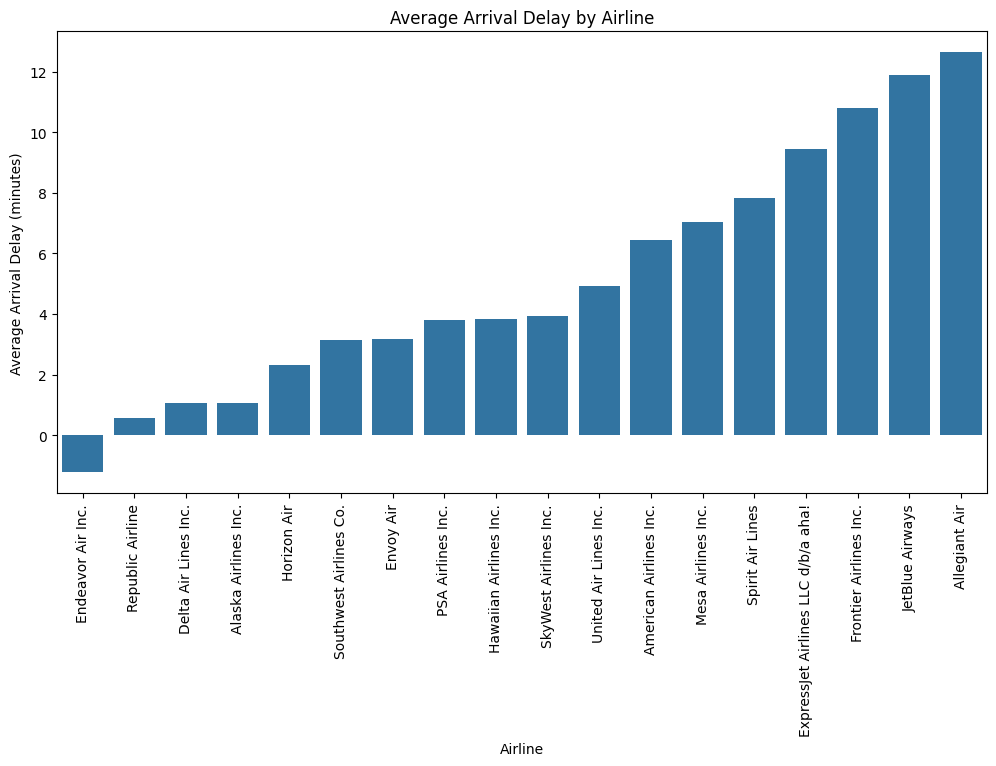

In [16]:
avg_delay_by_airline = flights.groupby('AIRLINE')['ARR_DELAY'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_delay_by_airline.index, y=avg_delay_by_airline.values)
plt.title('Average Arrival Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(rotation=90)
plt.show()

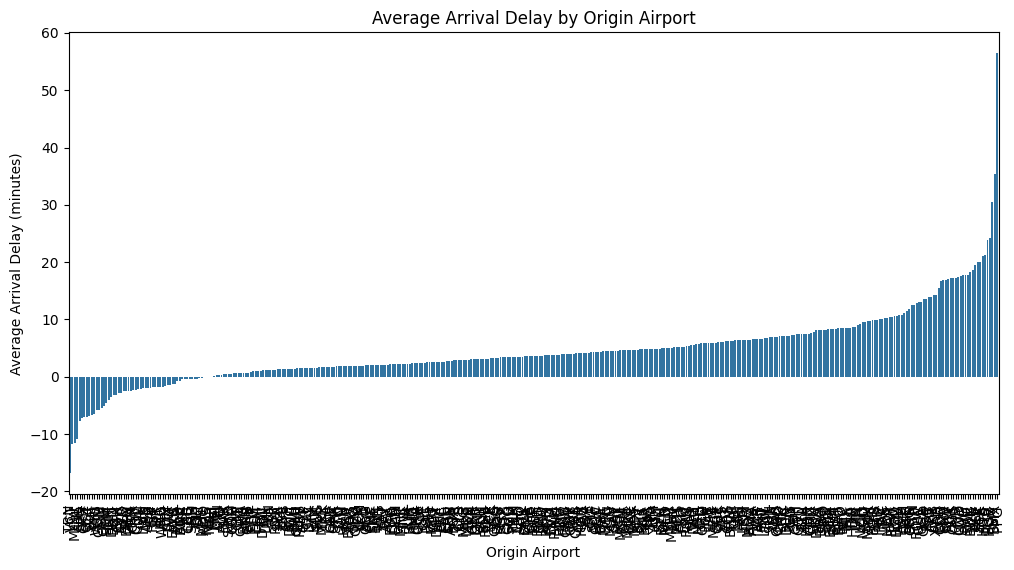

In [19]:
avg_delay_by_origin = flights.groupby('ORIGIN')['ARR_DELAY'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_delay_by_origin.index, y=avg_delay_by_origin.values)
plt.title('Average Arrival Delay by Origin Airport')
plt.xlabel('Origin Airport')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(rotation=90)
plt.show()

Sum of delays by reason:
DELAY_DUE_CARRIER          13217960.0
DELAY_DUE_WEATHER           2127583.0
DELAY_DUE_NAS               7028161.0
DELAY_DUE_SECURITY            77907.0
DELAY_DUE_LATE_AIRCRAFT    13598175.0
dtype: float64


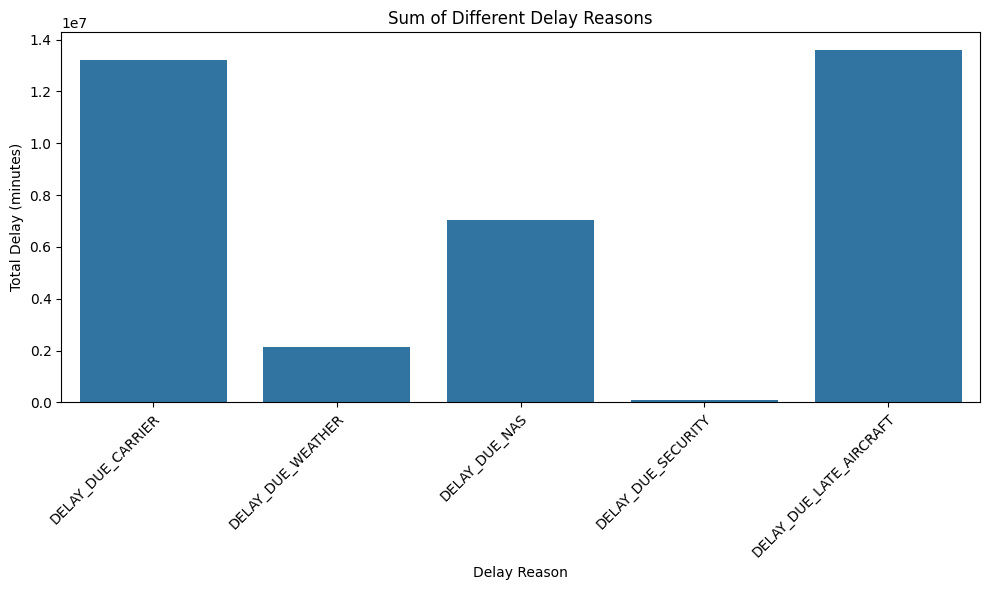

In [22]:
delay_reasons = ['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']
flights[delay_reasons] = flights[delay_reasons].apply(pd.to_numeric, errors='coerce')
for reason in delay_reasons:
    flights[reason] = flights[reason].apply(lambda x: x if x >= 0 else 0)
delay_sums = flights[delay_reasons].sum()
print("Sum of delays by reason:")
print(delay_sums)

plt.figure(figsize=(10, 6))
sns.barplot(x=delay_sums.index, y=delay_sums.values)
plt.title('Sum of Different Delay Reasons')
plt.xlabel('Delay Reason')
plt.ylabel('Total Delay (minutes)')

plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.tight_layout()  

plt.show()